### Step 1: Import packages and read Data

In [1]:
import pandas as pd
import pandas as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
df = pd.read_csv('./amazon_fine_food_reviews/Reviews.csv')
df = df.head(2000)

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


#### Quick EDA

<AxesSubplot:title={'center':'Count of Reviews by Stars'}>

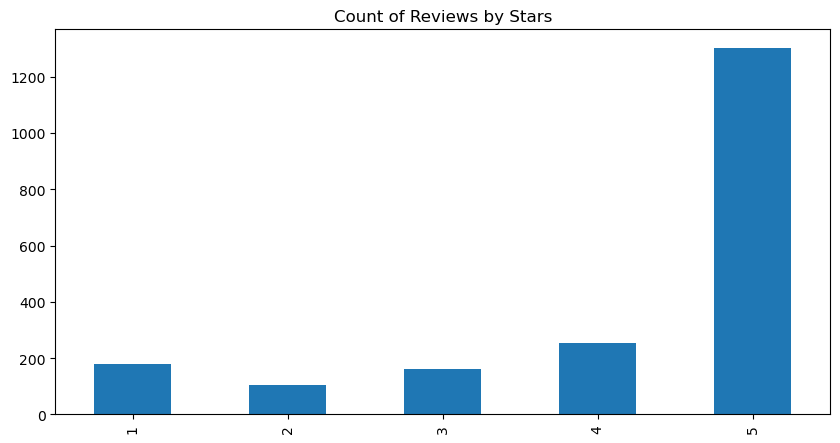

In [4]:
df.Score.value_counts().sort_index().plot(kind='bar' ,title='Count of Reviews by Stars',figsize=(10,5))

In [5]:
example = df['Text'][40]
example

"The variety packs taste great!<br /><br />I have them every morning. At $0.30 cents per meal, I don't understand why everyone on earth isn't buying this stuff up.<br /><br />Maple and brown sugar is terrific, followed by apples and cinnamon, followed by regular. You don't get tired of the same ole thing, and they taste great.<br /><br />I just boil water from a small pot, empty the packet or 2 in a bowl, pour in boiling water, and watch it expand to 2x its size!<br /><br />Taste really good and takes minutes to prepare.<br /><br />Not sure why everyone on earth isn't this. Convenient, healthy, very quick, excellent quality, and extremely cheap..."

In [6]:
tokens_sample = nltk.word_tokenize(example)

In [7]:
tagged = nltk.pos_tag(tokens_sample)

In [8]:
entity = nltk.chunk.ne_chunk(tagged)

In [9]:
entity.pprint()

(S
  The/DT
  variety/NN
  packs/VBZ
  taste/NN
  great/JJ
  !/.
  </JJ
  br/NN
  //NNP
  >/NNP
  </NNP
  br/NN
  //NNP
  >/NN
  I/PRP
  have/VBP
  them/PRP
  every/DT
  morning/NN
  ./.
  At/IN
  $/$
  0.30/CD
  cents/NNS
  per/IN
  meal/NN
  ,/,
  I/PRP
  do/VBP
  n't/RB
  understand/VB
  why/WRB
  everyone/NN
  on/IN
  earth/NN
  is/VBZ
  n't/RB
  buying/VBG
  this/DT
  stuff/NN
  up./JJ
  </NNP
  br/NN
  //NNP
  >/NNP
  </NNP
  br/NN
  //NNP
  >/NNP
  Maple/NNP
  and/CC
  brown/JJ
  sugar/NN
  is/VBZ
  terrific/JJ
  ,/,
  followed/VBN
  by/IN
  apples/NNS
  and/CC
  cinnamon/NN
  ,/,
  followed/VBN
  by/IN
  regular/JJ
  ./.
  You/PRP
  do/VBP
  n't/RB
  get/VB
  tired/VBN
  of/IN
  the/DT
  same/JJ
  ole/JJ
  thing/NN
  ,/,
  and/CC
  they/PRP
  taste/VBP
  great./JJ
  </NNP
  br/NN
  //NNP
  >/NNP
  </NNP
  br/NN
  //NNP
  >/NNP
  I/PRP
  just/RB
  boil/VBP
  water/NN
  from/IN
  a/DT
  small/JJ
  pot/NN
  ,/,
  empty/VBP
  the/DT
  packet/NN
  or/CC
  2/CD
  in/IN
  a/DT
  bowl/

### Step 02: VADER Sentiment Scoring

In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer
#Progress bar tracker tqdm
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [11]:
sia.polarity_scores('may be I am happy')

{'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'compound': 0.5719}

In [12]:
sia.polarity_scores('this is so bad and illegal')

{'neg': 0.676, 'neu': 0.324, 'pos': 0.0, 'compound': -0.8539}

In [13]:
res = {}
for i , row in tqdm(df.iterrows(), total = len(df)):
    text = row['Text']
    id = row['Id']
    res[id] = sia.polarity_scores(text)

  0%|          | 0/2000 [00:00<?, ?it/s]

In [14]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [15]:
vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,0.000,0.754,0.246,0.9744,B001E5E29A,A3IJNH61DY5N9K,Sharon Allan,10,11,5,1265846400,Great Waffles for us non-cooks,I have to laugh at the reviews that said it wa...
1996,1997,0.025,0.744,0.231,0.9978,B001E5E29A,A35W3JQYP0M655,"Ambergris ""John Thomas""",7,7,5,1279929600,Excellent Fluffy Pancakes.....,I had read some favorable reviews of this panc...
1997,1998,0.000,0.719,0.281,0.9501,B001E5E29A,A3CLWZGMC7M9Z1,"Hippie2MARS ""Hippie2MARS""",6,6,4,1250640000,Good Basic Mix,I was expecting great things based on the revi...
1998,1999,0.053,0.839,0.108,0.7003,B001E5E29A,A2V6P1FKRHCVQQ,S. Jackson,8,9,4,1265760000,"Good pancakes, lots of work",I love this pancake mix. I bought my first ca...


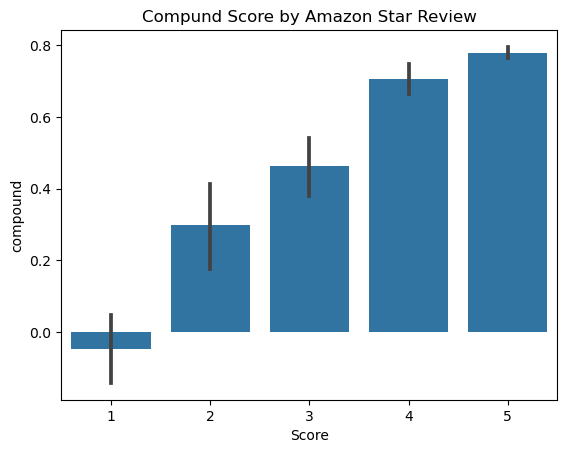

In [16]:
default_color = sns.color_palette()[0]
ax = sns.barplot(data=vaders, x='Score', y='compound',color = default_color)
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

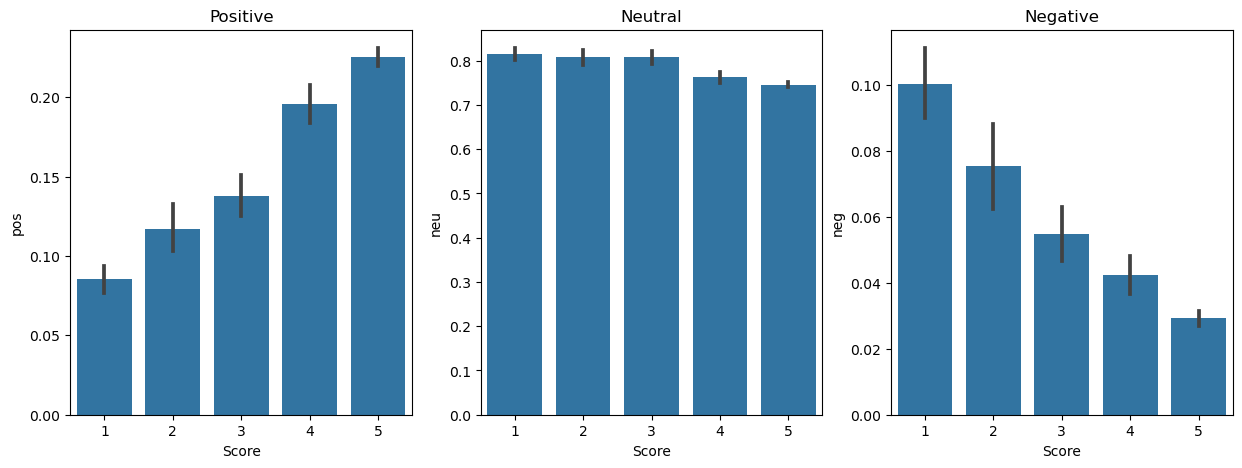

In [17]:
fig, axs = plt.subplots(1,3,figsize=(15,5)) 
sns.barplot(data= vaders,x='Score',y='pos',ax=axs[0],color=default_color)
sns.barplot(data= vaders,x='Score',y='neu',ax=axs[1],color=default_color)
sns.barplot(data= vaders,x='Score',y='neg',ax=axs[2],color=default_color)
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()

In [18]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [19]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [20]:

print(example)
sia.polarity_scores(example)

The variety packs taste great!<br /><br />I have them every morning. At $0.30 cents per meal, I don't understand why everyone on earth isn't buying this stuff up.<br /><br />Maple and brown sugar is terrific, followed by apples and cinnamon, followed by regular. You don't get tired of the same ole thing, and they taste great.<br /><br />I just boil water from a small pot, empty the packet or 2 in a bowl, pour in boiling water, and watch it expand to 2x its size!<br /><br />Taste really good and takes minutes to prepare.<br /><br />Not sure why everyone on earth isn't this. Convenient, healthy, very quick, excellent quality, and extremely cheap...


{'neg': 0.033, 'neu': 0.82, 'pos': 0.147, 'compound': 0.9301}

In [21]:
encoded_text = tokenizer(example,return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)

In [22]:
scores_dict = {
    'rob_neg' : scores[0],
    'rob_neu' : scores[1],
    'rob_pos' : scores[2],
}
print(scores_dict)

{'rob_neg': 0.009690555, 'rob_neu': 0.037833188, 'rob_pos': 0.95247626}


In [23]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'rob_neg' : scores[0],
        'rob_neu' : scores[1],
        'rob_pos' : scores[2]
    }
    return scores_dict

In [ ]:
res = {}
for i , row in tqdm(df.iterrows(), total = len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/2000 [00:00<?, ?it/s]

In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [ ]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'rob_neg', 'rob_neu', 'rob_pos'],
            hue='Score',
            palette='tab10')
plt.show()

In [ ]:
results_df.query('Score == 1') \
    .sort_values('rob_pos', ascending=False)['Text'].values[0]

In [ ]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]


In [ ]:
results_df.query('Score == 5') \
    .sort_values('rob_neg', ascending=False)['Text'].values[0]

In [ ]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

In [ ]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

In [ ]:
sent_pipeline('I love sentiment analysis!')

In [ ]:
sent_pipeline('Make sure to like and subscribe!')